In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## How you saved PFAM and CAZy annotations for published polyporales genomes 20241008

Pfam was a bid dataset for the laptop, saved them in csv to avoid these steps

```
pfam = pd.read_html('https://mycocosm.jgi.doe.gov/mycocosm/annotations/browser/pfam/summary;gPWEkC?p=agaricomycetes')[0]
pfam = pfam[[pfam.columns[0], pfam.columns[-1]] + [x for x in pfam.columns if x in polyporales]]
pfam.to_csv("../data/mycocosm/PFAM.polyporales_published_mycocosm_20241008.csv.gz", index = False, compression='gzip')

cazymes = pd.read_html('https://mycocosm.jgi.doe.gov/mycocosm/annotations/browser/cazy/summary;VEqLv4?p=agaricomycetes')[0]
cazymes = cazymes[[cazymes.columns[0], cazymes.columns[-1]] + [x for x in cazymes.columns if x in polyporales]]
cazymes.to_csv("../data/mycocosm/CAZy.polyporales_published_mycocosm_20241008.csv.gz", index = False, compression='gzip')
```

# Functions

In [21]:
def plot_hist_density(term, abie_count, abie_ms_count, count_list):
    """
    Plots a histogram and density plot for a term's distribution in count_list with abie_count highlighted.
    Called by summarize_pfam_term and summarize_cazy_term for the plotting.

    Example usage:
    plot_hist_density('Protein-coding genes', abie_count, abie_ms_count, polyporales_df['#of genes'].tolist())
    """
    mean_value = np.mean(count_list)
    median_value = np.median(count_list)
    print(f"Count of {term} in Abie genome is {abie_count} ({abie_ms_count} quantified in MS).\nMean and median of {term} in polyporales are {mean_value:.1f} and {median_value}.")

    plt.figure(figsize=(10, 5))

    # Histogram
    plt.hist(count_list, bins=10, alpha=0.6, label='Histogram', density=True)
    # Density Plot
    density = pd.Series(count_list).plot(kind='density', color='red', label='Density')
    # Plot quantiles 
    for q in [0.25, 0.5, 0.75]:
        plt.axvline(np.quantile(count_list, q), color='blue', linestyle='--', label=f'{int(q*100)}th Percentile')
    # Highlight abie_count with a dashed line
    plt.axvline(x=abie_count, color='red', linestyle='--', label=f'Abie Count ({abie_count})')
    
    plt.title("Histogram and Density Plot of " + term + " count in published polyporales genomes.")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.xlim(0)
    plt.legend()
    plt.show()


def summarize_pfam_term(pfam_acc:str, term:str):
    """
    Give a PFAM accession and a term describing it.
    Will output the count of PFAM accessions in A. biennis genome and the histogram and density of counts in polyporales genomes.

    Example usage:
    summarize_pfam_term("PF01185", 'hydrophobins')
    """

    temp_list = pfam.loc[pfam['Annotations/Genomes'] == pfam_acc].iloc[:, 2:].select_dtypes(include=[np.number]).stack().dropna().tolist()

    temp_df = df.loc[(~df['Sig_acc'].isnull()) & (df['Sig_acc'].str.contains(pfam_acc))]
    temp_df = temp_df.drop_duplicates("GeneID")
    

    abie_count = len(temp_df)
    abie_ms_count = len(temp_df.loc[temp_df['MS'] == "quant"])
    
    plot_hist_density(term, abie_count, abie_ms_count, temp_list)






def summarize_cazy_term(cazy_term:str, cazy_level:str):
    """
    Give a CAZy term and its level (class, family, subfamily).
    Will output the count of this term in A. biennis genome and the histogram and density of counts in polyporales genomes.

    Example usage:
    summarize_cazy_term("AA1_1", "subfamily")
    summarize_cazy_term("AA1", "family")
    summarize_cazy_term("AA", "class")
    """
    
    temp_list = cazy.loc[cazy['Annotations/Genomes'] == cazy_term].iloc[:, 2:].select_dtypes(include=[np.number]).stack().dropna().tolist()


    temp_df = cazy_df.loc[cazy_df['cazy_' + cazy_level] == cazy_term]
    temp_df = temp_df.drop_duplicates("GeneID")

    abie_count = len(temp_df)
    abie_ms_count = len(df.loc[(df['proteinId'].isin(temp_df['proteinId'].tolist())) & (df['MS'] == "quant")])

    plot_hist_density(cazy_term, abie_count, abie_ms_count, temp_list)


# Load data

In [22]:
polyporales_df = pd.read_csv("../data/mycocosm/polyporales_published_mycocosm_20241008.csv")
polyporales = polyporales_df['portal'].tolist()
print(len(polyporales), "published polyporales genomes used for this analysis.")

pfam = pd.read_csv("../data/mycocosm/PFAM.polyporales_published_mycocosm_20241008.csv.gz")
cazy = pd.read_csv("../data/mycocosm/CAZy.polyporales_published_mycocosm_20241008.csv.gz")

df = pd.read_csv("../data/Abiennis_protein_annotations.csv.gz")
df["GeneID"] = df['proteinId'].str.split("-R").str[0]

cazy_df = pd.read_csv("../data/CAZymes_multipleRowsPerProtein.csv.gz")
cazy_df['GeneID'] = cazy_df['proteinId'].str.split("-R").str[0]

64 published polyporales genomes used for this analysis.


# Total protein-coding genes

Count of Protein-coding genes in Abie genome is 12083 (1206 quantified in MS).
Mean and median of Protein-coding genes in polyporales are 13752.2 and 13680.5.


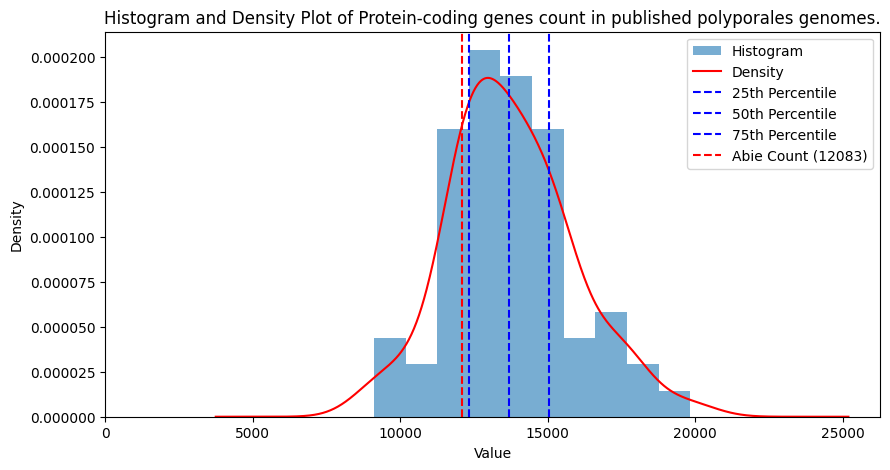

In [23]:
temp_list = polyporales_df['#of genes'].tolist()

temp_df = df.drop_duplicates("GeneID")

abie_count = len(temp_df)
abie_ms_count = len(df.loc[(df['proteinId'].isin(temp_df['proteinId'].tolist())) & (df['MS'] == "quant")])

plot_hist_density('Protein-coding genes', abie_count, abie_ms_count, temp_list)

# CAZymes

## Total CAZymes
Count of CAZymes counting only members of the catalytic classes.

Count of CAZymes in Abie genome is 383 (197 quantified in MS).
Mean and median of CAZymes in polyporales are 390.8 and 386.0.


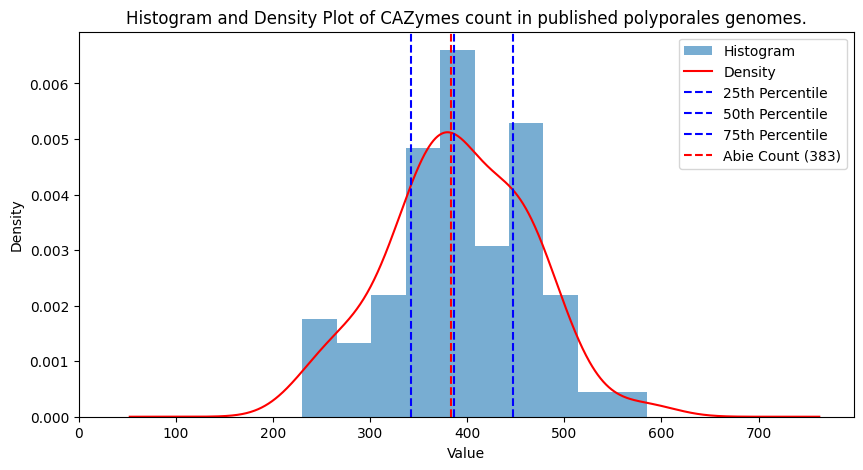

In [47]:
cazy_classes = ["AA", "CE", "GH", "GT", "PL"]

temp_list = cazy.loc[cazy['Annotations/Genomes'].isin(cazy_classes)].iloc[:, 2:].sum(skipna=True).tolist()

temp_df = cazy_df.loc[cazy_df['cazy_class'].isin(cazy_classes)]
temp_df = temp_df.drop_duplicates("GeneID")

abie_count = len(temp_df)
abie_ms_count = len(df.loc[(df['proteinId'].isin(temp_df['proteinId'].tolist())) & (df['MS'] == "quant")])

plot_hist_density('CAZymes', abie_count, abie_ms_count, temp_list)

## Plot classes, families or subfamilies of interest

Provide the term and its level in the summarize_cazy_term function 

```
Example usage:
    summarize_cazy_term("AA1_1", "subfamily")
    summarize_cazy_term("AA1", "family")
    summarize_cazy_term("AA", "class")
```

Count of AA in Abie genome is 80 (34 quantified in MS).
Mean and median of AA in polyporales are 80.9 and 77.5.


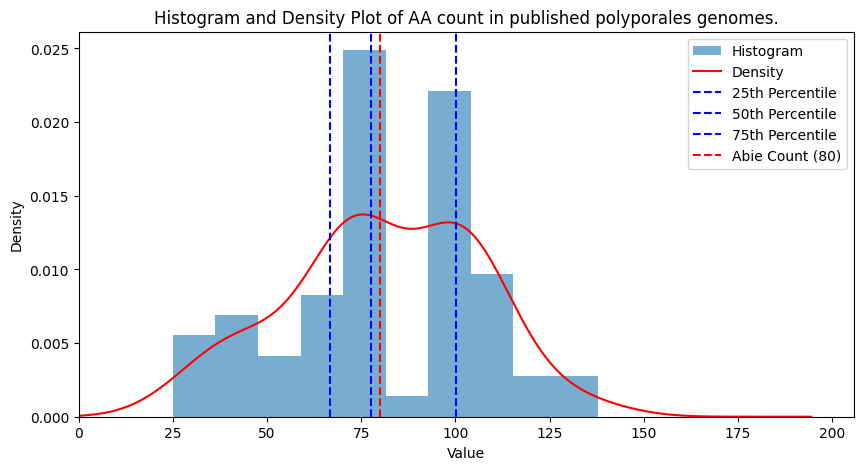

Count of CE in Abie genome is 20 (13 quantified in MS).
Mean and median of CE in polyporales are 17.0 and 17.0.


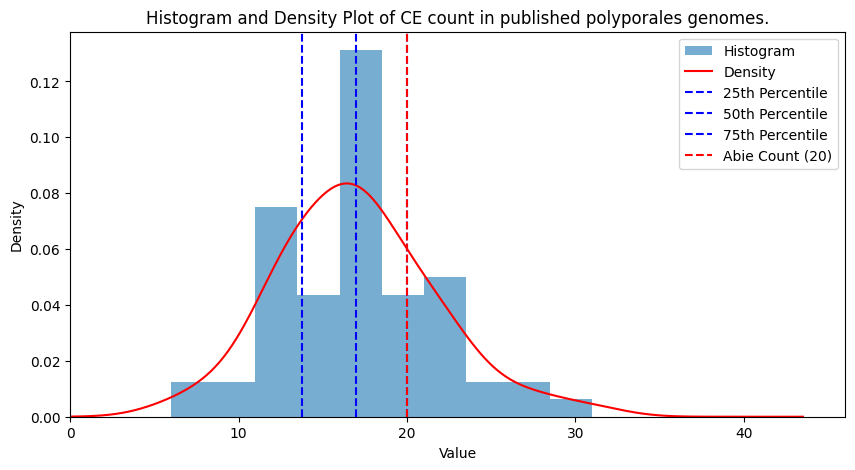

Count of EXPN in Abie genome is 19 (11 quantified in MS).
Mean and median of EXPN in polyporales are 19.0 and 19.0.


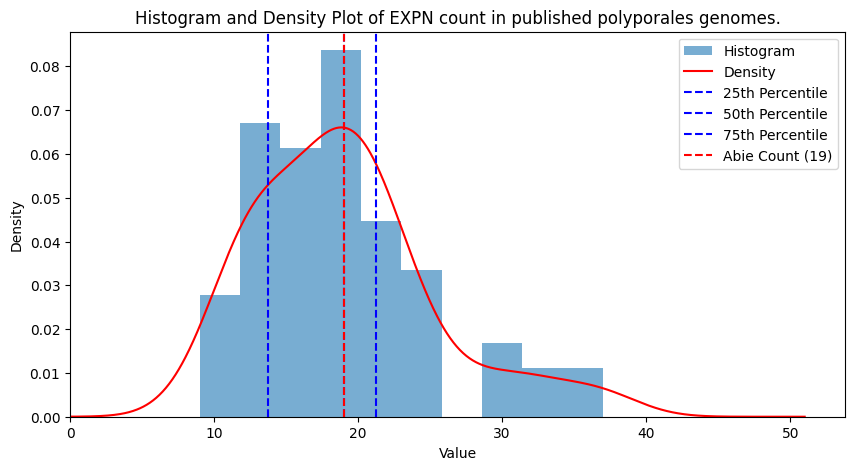

Count of CBM in Abie genome is 47 (39 quantified in MS).
Mean and median of CBM in polyporales are 52.1 and 52.0.


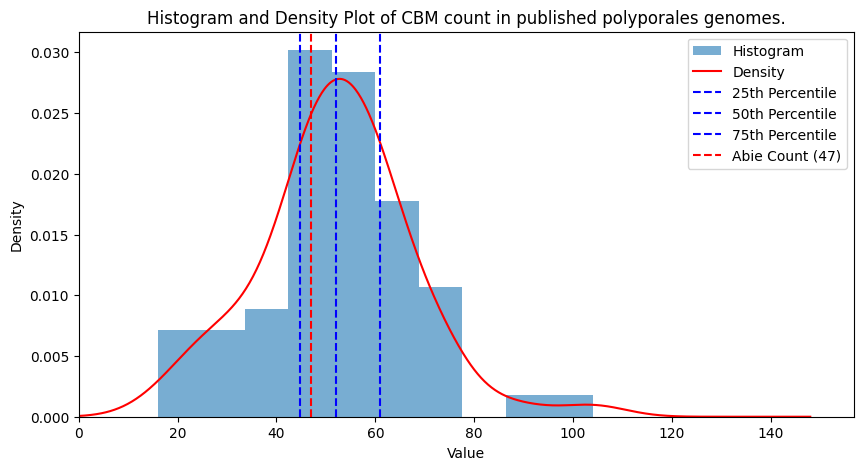

In [35]:
for clas in ['AA', 'CE',  'EXPN', 'CBM']:
    summarize_cazy_term(clas, "class")
    

AA1
Count of AA1 in Abie genome is 10 (6 quantified in MS).
Mean and median of AA1 in polyporales are 8.9 and 8.5.


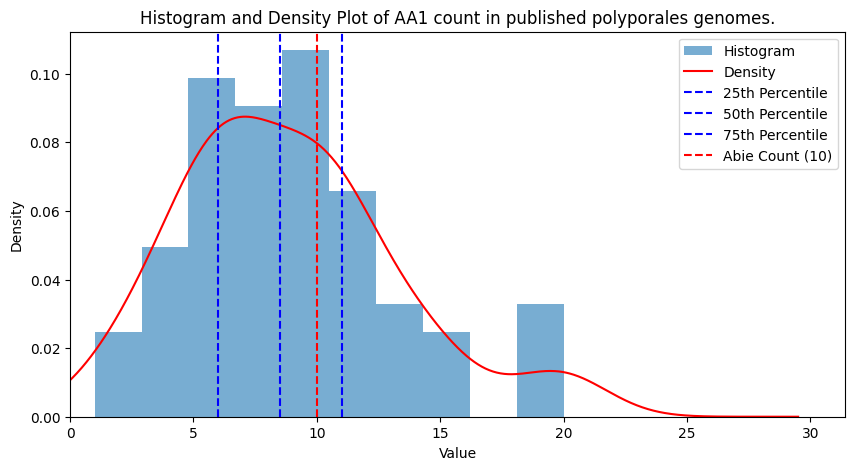

AA2
Count of AA2 in Abie genome is 15 (5 quantified in MS).
Mean and median of AA2 in polyporales are 13.2 and 13.0.


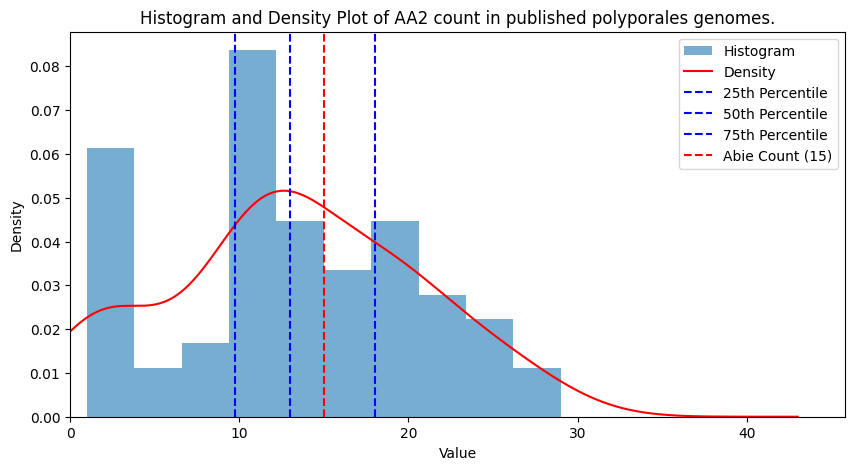

AA9
Count of AA9 in Abie genome is 19 (8 quantified in MS).
Mean and median of AA9 in polyporales are 14.2 and 16.0.


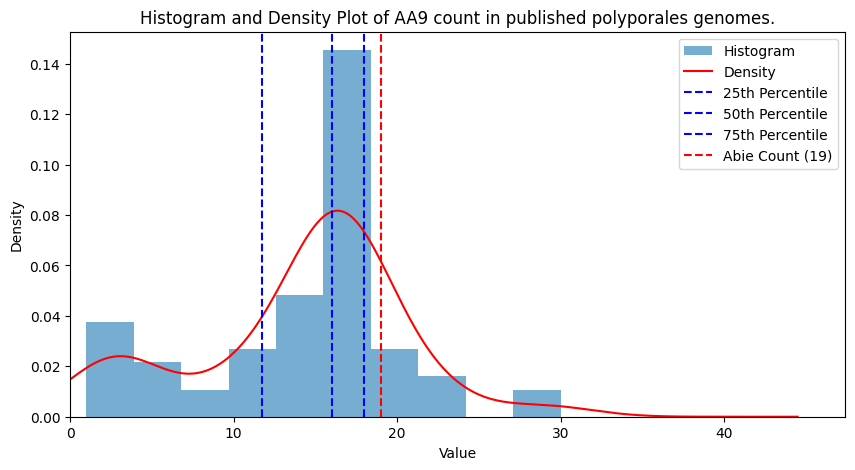

AA14
Count of AA14 in Abie genome is 3 (0 quantified in MS).
Mean and median of AA14 in polyporales are 3.4 and 4.0.


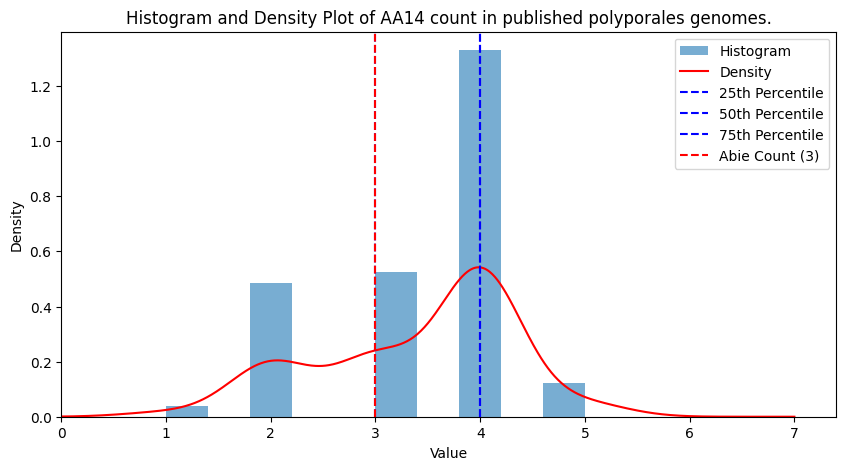

In [34]:
for fam in ['AA1', 'AA2', 'AA9',  'AA14']:
    summarize_cazy_term(fam, "family")

# PFAM domains

Search for PFAM domains of interest and plot them
```
Example usage:
    summarize_pfam_term("PF01185", "hydrophobins")
```

Count of hydrophobins in Abie genome is 8 (0 quantified in MS).
Mean and median of hydrophobins in polyporales are 16.6 and 20.0.


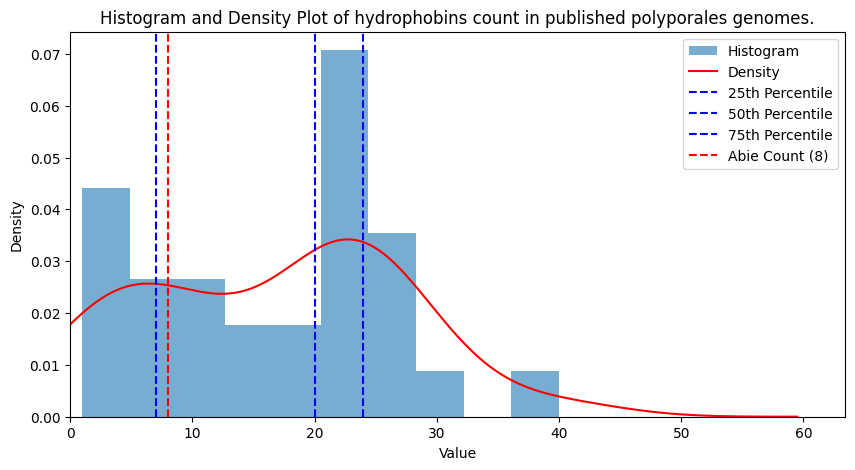



Count of chloroperoxidase in Abie genome is 3 (1 quantified in MS).
Mean and median of chloroperoxidase in polyporales are 4.0 and 4.0.


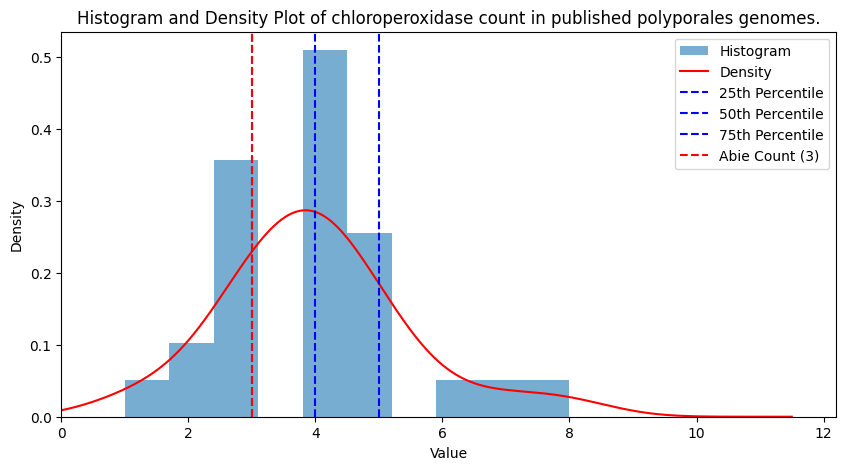



Count of catalase core-domain in Abie genome is 3 (3 quantified in MS).
Mean and median of catalase core-domain in polyporales are 3.4 and 3.0.


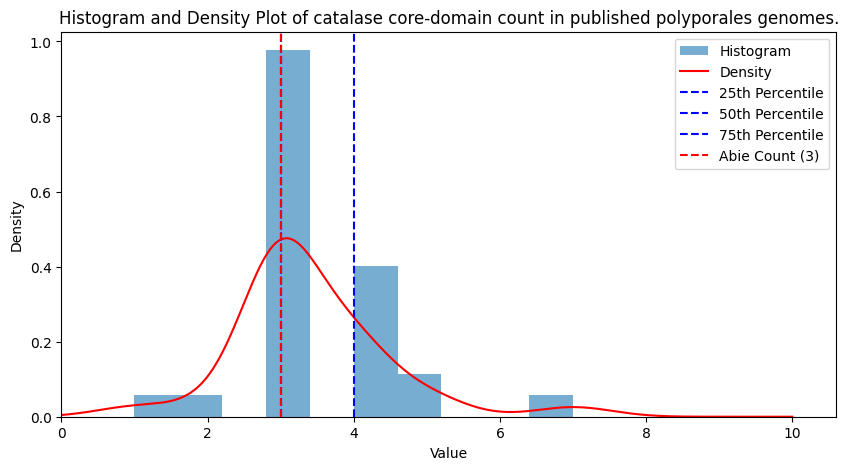

In [42]:
pfam_accs = ["PF01185", "PF01328", "PF00199"]
pfam_terms = ["hydrophobins", "chloroperoxidase", 'catalase core-domain']

for f, b in zip(pfam_accs, pfam_terms):
    summarize_pfam_term(f,  b)
    print("\n")